In [1]:
# Nativos
import random as rn
import os
import sys
import gc

#calculo
import numpy as np
import pandas as pd
import scipy

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

SEED = 29082013
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)


In [2]:
read_parameters = {
    'sep': '\t',
    'header': None,
}

col_date = 21
col_value = 20
col_item_id = 3

# las columnas de la data no estan ordenadas por fecha y hora, estan ordenadas por item id.
# Esto quieres decir por ejemplo que las primeras 10000 columnas pertenece al item fileSystem, reportado cada 1 minuto
# las siguiente 10000 columnas pertenece a la memoria RAM, igualmente cada 1 minutos
# Ahora los diferentes items id, no se reportan todos en un mismo instante, sino con un desfase de 1 segundo.
# por ejemplo obtenemos fileSystem en el tiempo 00:00:01 y RamMemory en 00:00:02 y asi sucesivamente
# pero si nuestro intervalo de tiempo menor es 1 minuto, no hay problema porque en ese lapso ya se habran registrado todos los items-id, 

In [6]:
#file = 'POC_SUN6C52_Reporte 394438.csv'
file_report_sun6c52 = 'POC_SUN6C52_Reporte 396484.csv'
file_report_prd01bl = 'POC_PRD01BL_Reporte 323260.csv'
file_incidentes = 'Lista de Incidencias - Diciembre - Enero.xlsx'

In [7]:
def read_incidencias(excel_name):
    data = pd.read_excel(excel_name)
    
    data['tiempo'] = data['FECHA DE INICIO'].astype(str) + ' ' + data['HORA DE INICIO'].astype(str)
    data['tiempo'] = pd.to_datetime(
        data['tiempo'], 
    )
    
    data = data.sort_values(by=['tiempo'])
    data.set_index('tiempo', inplace=True)
    
    data['event'] = 110
    return data


def read_report(csv_name):
    data = pd.read_csv(
        csv_name, **read_parameters
    )
    
    data[col_date] = pd.to_datetime(data[col_date])
    #data = data.sort_values(by=[col_date])
    #data.set_index(col_date, inplace=True)
    
    return data

In [8]:
data_report_sun6c52 = read_report(file_report_sun6c52)
data_report_prd01bl = read_report(file_report_prd01bl)

data_incidencias = read_incidencias(file_incidentes)

In [9]:
data_report_sun6c52.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,10903,sun6c52,10903,105107,0,10903,Processor load (15 min average per core),"system.cpu.load[percpu,avg15]",1m,1w,...,23001,619.0,30d,3s,200.0,The processor load is calculated as system CPU...,105107.0,1.577740e+09,0.4666,2019-12-30 15:59:47
1,10903,sun6c52,10903,105107,0,10903,Processor load (15 min average per core),"system.cpu.load[percpu,avg15]",1m,1w,...,23001,619.0,30d,3s,200.0,The processor load is calculated as system CPU...,105107.0,1.577740e+09,0.4698,2019-12-30 16:00:47
2,10903,sun6c52,10903,105107,0,10903,Processor load (15 min average per core),"system.cpu.load[percpu,avg15]",1m,1w,...,23001,619.0,30d,3s,200.0,The processor load is calculated as system CPU...,105107.0,1.577740e+09,0.4781,2019-12-30 16:01:47
3,10903,sun6c52,10903,105107,0,10903,Processor load (15 min average per core),"system.cpu.load[percpu,avg15]",1m,1w,...,23001,619.0,30d,3s,200.0,The processor load is calculated as system CPU...,105107.0,1.577740e+09,0.4780,2019-12-30 16:02:47
4,10903,sun6c52,10903,105107,0,10903,Processor load (15 min average per core),"system.cpu.load[percpu,avg15]",1m,1w,...,23001,619.0,30d,3s,200.0,The processor load is calculated as system CPU...,105107.0,1.577740e+09,0.4809,2019-12-30 16:03:47


In [10]:
data_report_prd01bl.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,10717,prd01bl,10717,86323,0,10717,Processor load (1 min average per core),"system.cpu.load[percpu,avg1]",1m,1w,...,29736,446.0,30d,3s,200.0,The processor load is calculated as system CPU...,86323.0,1.577740e+09,0.8962,2019-12-30 15:59:43
1,10717,prd01bl,10717,86323,0,10717,Processor load (1 min average per core),"system.cpu.load[percpu,avg1]",1m,1w,...,29736,446.0,30d,3s,200.0,The processor load is calculated as system CPU...,86323.0,1.577740e+09,0.9296,2019-12-30 16:00:43
2,10717,prd01bl,10717,86323,0,10717,Processor load (1 min average per core),"system.cpu.load[percpu,avg1]",1m,1w,...,29736,446.0,30d,3s,200.0,The processor load is calculated as system CPU...,86323.0,1.577740e+09,0.9421,2019-12-30 16:01:43
3,10717,prd01bl,10717,86323,0,10717,Processor load (1 min average per core),"system.cpu.load[percpu,avg1]",1m,1w,...,29736,446.0,30d,3s,200.0,The processor load is calculated as system CPU...,86323.0,1.577740e+09,0.9100,2019-12-30 16:02:43
4,10717,prd01bl,10717,86323,0,10717,Processor load (1 min average per core),"system.cpu.load[percpu,avg1]",1m,1w,...,29736,446.0,30d,3s,200.0,The processor load is calculated as system CPU...,86323.0,1.577740e+09,0.9250,2019-12-30 16:03:43


In [11]:
data_incidencias.head()

,ITEM,FECHA DE INICIO,DIA,MES,HORA DE INICIO,FECHA DE FIN,HORA DE FIN,HORA SOLUCION,TIPO DE ALERTA,CATEGORIA,PLATAFORMA,SERVICIO,UBICACIÓN DEL PROBLEMA,SERVIDOR,TICKET REMEDY,CAUSA DE ALERTA,DETALLE,OBSERVACION,event
tiempo,,,,,,,,,,,,,,,,,,,
2019-12-23 00:01:00,1,2019-12-23,lunes,Diciembre,00:01:00,2019-12-25,04:33:00,1900-01-02 04:32:00,NaN,NaN,ZABBIX,INFRAESTRUCTURA,MEMORIA,vmosbcmovilprod01,INC000003648704,INCIDENCIA,CHECKING EVERIS,Memoria: % de uso > 95% vmosbcmovilprod01,110
2019-12-23 00:04:00,2,2019-12-23,lunes,Diciembre,00:04:00,2019-12-23,00:22:00,00:18:00,NaN,NaN,DAEMONS,DAEMONS_SUMMARY,OPERATIONAL DAEMONS - BILLING,prd01bl,SIN REMEDY,MANTENIMIENTO PROGRAMADO,EOD,MANTENIMIENTO PROGRAMADO,110
2019-12-23 00:40:00,3,2019-12-23,lunes,Diciembre,00:40:00,2019-12-23,04:48:00,04:08:00,NaN,NaN,ZABBIX,INFRAESTRUCTURA,DISCO,vmadminprod01-1,INC000003648714,INCIDENCIA,CHECKING EVERIS,Free disk space is less than 10% on volume /u0...,110
2019-12-23 01:00:00,4,2019-12-23,lunes,Diciembre,01:00:00,2019-12-23,01:04:00,00:04:00,NaN,NaN,ZABBIX,INFRAESTRUCTURA,DISCO,SUN42,INC000003648844,INCIDENCIA,CHECKING EVERIS,Free disk space is less than 10% on volume /sa...,110
2019-12-23 01:08:00,6,2019-12-23,lunes,Diciembre,01:08:00,2019-12-23,01:51:00,00:43:00,NaN,NaN,DAEMONS,DAEMONS_SUMMARY,OPERATIONAL DAEMONS - RM,prd01bl,SIN REMEDY,MANTENIMIENTO PROGRAMADO,DAEMON BOUNCE,MANTENIMIENTO PROGRAMADO,110


# filtrar la data en las incidencias por servidores, en este caso trabajamos con 2. SUN6C52 Y PRD01BL

In [12]:
data_inci_sun6c52 = data_incidencias[(data_incidencias.SERVIDOR == 'sun6c52') & (data_incidencias['CAUSA DE ALERTA']=='INCIDENCIA')]
data_inci_prd01bl = data_incidencias[(data_incidencias.SERVIDOR == 'prd01bl') & (data_incidencias['CAUSA DE ALERTA']=='INCIDENCIA')]

data_inci_sun6c52_zabbix = data_inci_sun6c52[data_inci_sun6c52.PLATAFORMA == 'ZABBIX']
data_inci_prd01bl_zabbix = data_inci_prd01bl[data_inci_prd01bl.PLATAFORMA == 'ZABBIX']

In [13]:
print(data_inci_sun6c52.shape)
print(data_inci_prd01bl.shape)

print(data_inci_sun6c52_zabbix.shape)
print(data_inci_prd01bl_zabbix.shape)

(124, 19)
(53, 19)
(118, 19)
(10, 19)


In [14]:
data_inci_sun6c52_zabbix.head()

,ITEM,FECHA DE INICIO,DIA,MES,HORA DE INICIO,FECHA DE FIN,HORA DE FIN,HORA SOLUCION,TIPO DE ALERTA,CATEGORIA,PLATAFORMA,SERVICIO,UBICACIÓN DEL PROBLEMA,SERVIDOR,TICKET REMEDY,CAUSA DE ALERTA,DETALLE,OBSERVACION,event
tiempo,,,,,,,,,,,,,,,,,,,
2019-12-23 04:36:00,27,2019-12-23,lunes,Diciembre,04:36:00,2019-12-23,04:44:00,00:08:00,NaN,NaN,ZABBIX,PROCESOS,PROCESOS,sun6c52,INC000003649547,INCIDENCIA,CHECKING EVERIS UNIX,No hay procesos gpiwcms009.4ge por mas de 15 M...,110
2019-12-23 04:59:00,28,2019-12-23,lunes,Diciembre,04:59:00,2019-12-23,05:11:00,00:12:00,NaN,NaN,ZABBIX,PROCESOS,PROCESOS,sun6c52,INC000003649548,INCIDENCIA,CHECKING EVERIS,No hay procesos gpiwcms009.4ge por mas de 15 M...,110
2019-12-23 05:31:00,30,2019-12-23,lunes,Diciembre,05:31:00,2019-12-23,05:45:00,00:14:00,NaN,NaN,ZABBIX,PROCESOS,PROCESOS,sun6c52,INC000003649847,INCIDENCIA,CHECKING EVERIS,No hay procesos gpiwcms009.4ge por mas de 15 M...,110
2019-12-23 07:51:00,40,2019-12-23,lunes,Diciembre,07:51:00,2019-12-23,07:55:00,00:04:00,NaN,NaN,ZABBIX,PROCESOS,PROCESOS,sun6c52,INC000003650312,INCIDENCIA,CHECKING EVERIS,No hay procesos gpiwcms009.4ge por mas de 15 M...,110
2019-12-23 23:56:00,98,2019-12-23,lunes,Diciembre,23:56:00,2019-12-24,00:05:00,00:09:00,NaN,NaN,ZABBIX,PROCESOS,PROCESOS,sun6c52,INC000003654898,INCIDENCIA,CHECKING EVERIS,No hay procesos gpiwcms009.4ge por mas de 15 M...,110


# ahora obtendremos un dictionary por cada servidor, donde key=item_id y value=DataFrame order by DateTime

In [15]:
def get_indexs(data_report):
    items_id = data_report[col_item_id][:].tolist()
    items_id_dict = {}
    
    cambios = []
    items = []
    for i, item in enumerate(items_id):
        if item in items_id_dict.keys(): 
            items_id_dict[item] = items_id_dict[item] + 1
        else:
            items_id_dict[item] = 1
            cambios.append(i)
            items.append(item)
            
    return items

In [16]:
data_report_list = [data_report_sun6c52, data_report_prd01bl]
data_report_list_dict = []

In [17]:
for _data in data_report_list:
    items_id = get_indexs(_data)
    
    print(items_id)
    dict1 = {}
    for _item_id in items_id:
        filtro = _data[col_item_id] == _item_id
        df = _data[filtro]
        dict1[_item_id] = df

    data_report_list_dict.append(dict1)

[105107, 105108, 105109, 105111, 105112, 105113, 105114, 105118, 105326, 105327, 172755, 105328, 105329, 105330, 105331, 105332, 105333, 105334, 105335, 105336, 105337, 105338, 114466]
[86323, 86328, 86339, 86869, 86870, 86871, 86872, 86882, 86873, 86879, 86880, 86875, 86881]


In [ ]:
#b = data_inci_sun6c52_zabbix.iloc[0:30].copy()

#b.head()

#b.plot.axvline(color='k', linestyle='--')
#b.plot(y='event',kind='bar')
#b['event'].plot.bar()

In [ ]:
#for date in data_inci_sun6c52_zabbix.iloc[0:10].index:
#    print(date)

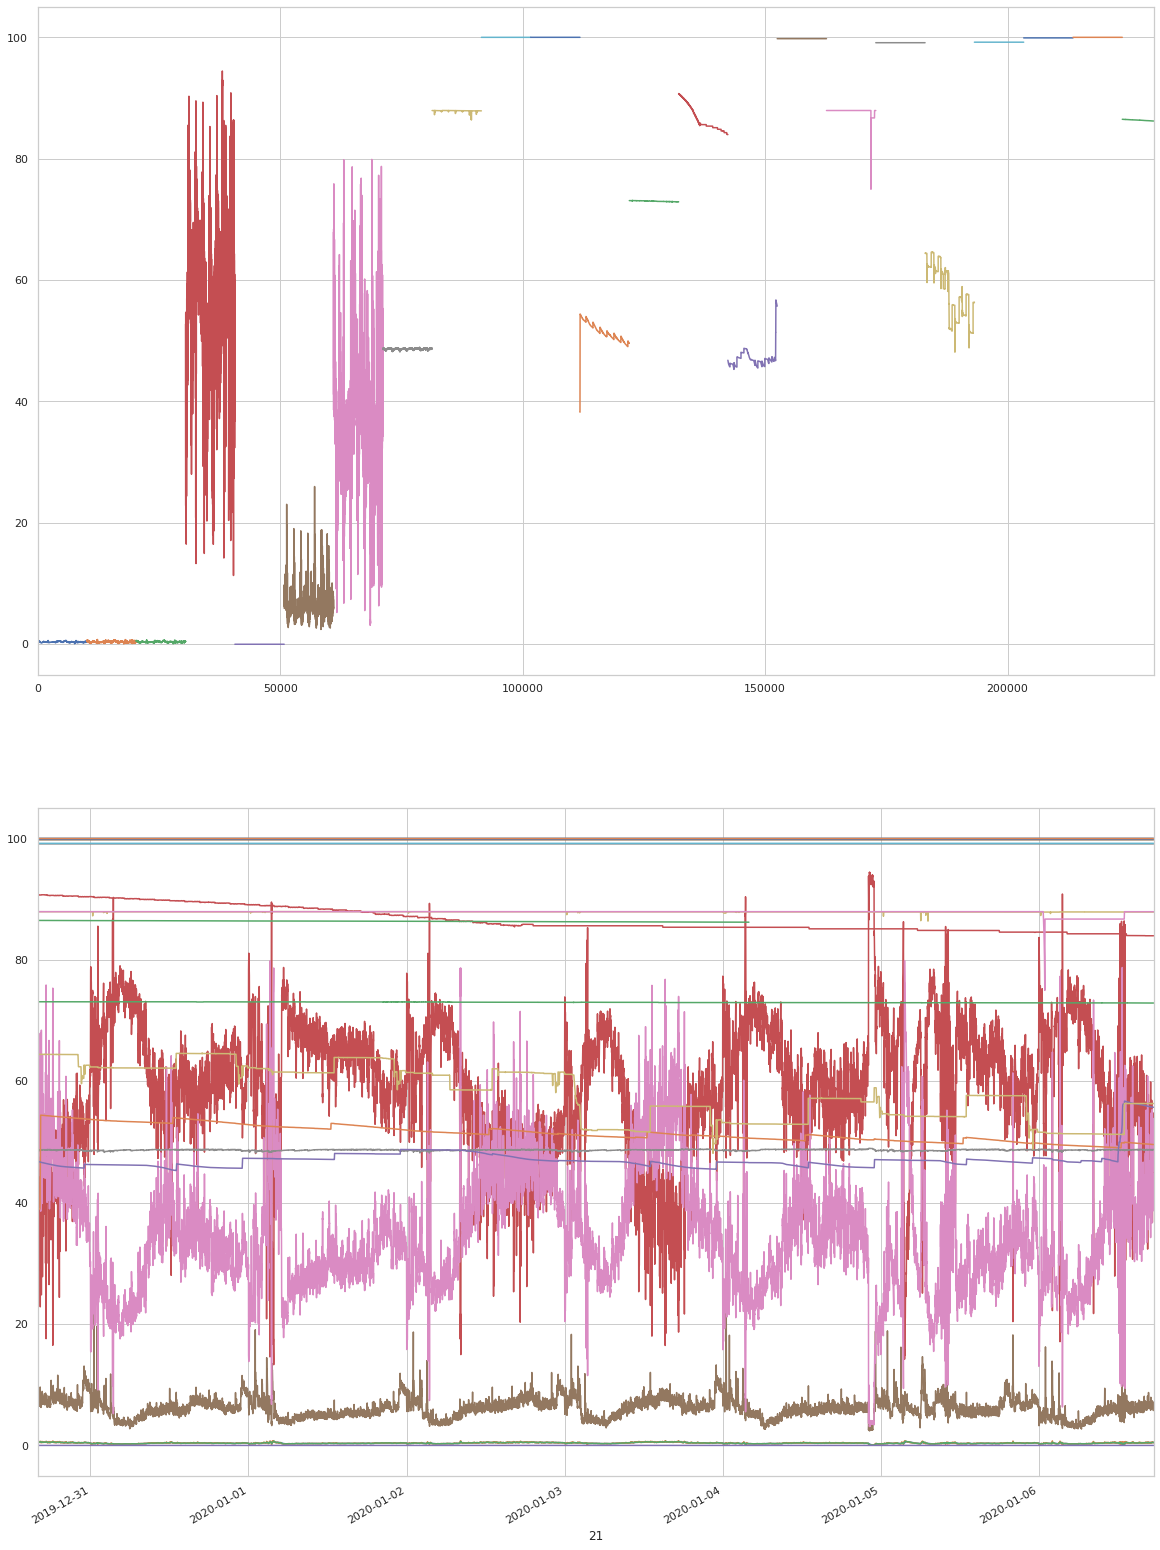

In [20]:
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 30))
# plot the differents items wrt to index for default
for _item in data_report_list_dict[0].keys():
    data_report_list_dict[0][_item][col_value][:].plot(ax=axes[0])

    
# plot the differents items wrt to DateTime
#ax = plt.plot()
for _item in data_report_list_dict[0].keys():
    _df = data_report_list_dict[0][_item].copy()
    _df.set_index(col_date, inplace=True)

    _df[col_value][:].plot(ax=axes[1])


#axes[1].axvline(data_inci_sun6c52_zabbix, color='r', linestyle='--', lw=2)

#for date in data_inci_sun6c52_zabbix.index:
#    axes[1].axvline(date, color="red", linestyle="--")
plt.savefig('grafica_.png')

# plot las diferentes metricas desplazadas unas de otras

Text(0.5, 0.98, 'Servidor: SUN6C52')

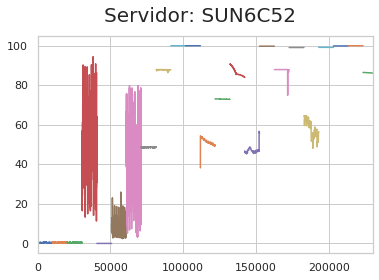

In [22]:
# para el servidor SUN6C52
ax = None
for _item in data_report_list_dict[0].keys():
    if ax == None: ax = data_report_list_dict[0][_item][col_value][:].plot()
    else: data_report_list_dict[0][_item][col_value][:].plot(ax=ax)
        
plt.suptitle('Servidor: SUN6C52', fontsize=20)

Text(0.5, 0.98, 'Servidor: PRD01BL')

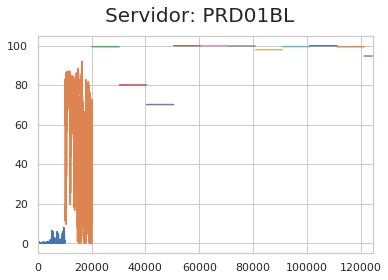

In [23]:
# para el servidor PRD01BL
ax = None
for _item in data_report_list_dict[1].keys():
    if ax == None: ax = data_report_list_dict[1][_item][col_value][:].plot()
    else: data_report_list_dict[1][_item][col_value][:].plot(ax=ax)

plt.suptitle('Servidor: PRD01BL', fontsize=20)

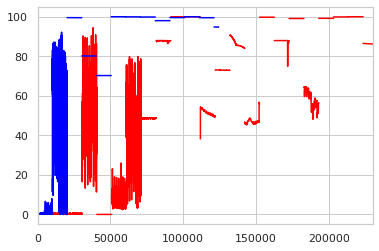

In [24]:
# para los dos servidores
ax = None
for _item in data_report_list_dict[0].keys():
    if ax == None: ax = data_report_list_dict[0][_item][col_value][:].plot()
    else: data_report_list_dict[0][_item][col_value][:].plot(ax=ax,color='red')
        
for _item in data_report_list_dict[1].keys():
    if ax == None: ax = data_report_list_dict[1][_item][col_value][:].plot()
    else: data_report_list_dict[1][_item][col_value][:].plot(ax=ax, color='blue')

# plot las metricas con respecto al tiempo, ademas se indica donde ocurrio un evento

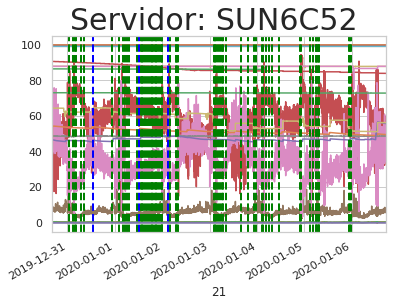

In [25]:
# para el servidor 0
ax = None
for _item in data_report_list_dict[0].keys():
    _df = data_report_list_dict[0][_item].copy()
    _df.set_index(col_date, inplace=True)

    if ax == None: ax = _df[col_value][:].plot()
    else: _df[col_value][:].plot(ax=ax)
#axes[1].axvline(data_inci_sun6c52_zabbix, color='r', linestyle='--', lw=2)

plt.suptitle('Servidor: SUN6C52', fontsize=30)


# plot alertas hechas por el ZABBIX
for date in data_inci_sun6c52_zabbix.index:
    ax.axvline(date, color="green", linestyle="--", lw=2)
    
# plot aleartas hechas por otras plataformas
aux = data_inci_sun6c52[data_inci_sun6c52.PLATAFORMA != 'ZABBIX']
#aux = data_inci_sun6c52[data_inci_sun6c52['CAUSA DE ALERTA'] == 'MANTENIMIENTO PROGRAMADO']

for date in aux.index:
    ax.axvline(date, color="blue", linestyle="--", lw=2)


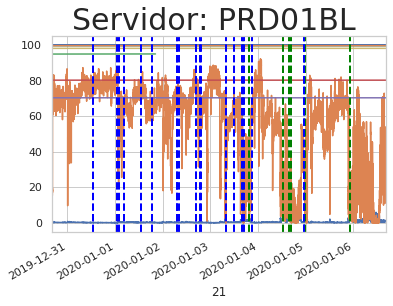

In [26]:
# para el servidor 1
ax = None
for _item in data_report_list_dict[1].keys():
    _df = data_report_list_dict[1][_item].copy()
    _df.set_index(col_date, inplace=True)

    if ax == None: ax = _df[col_value][:].plot()
    else: _df[col_value][:].plot(ax=ax)
#axes[1].axvline(data_inci_sun6c52_zabbix, color='r', linestyle='--', lw=2)

plt.suptitle('Servidor: PRD01BL', fontsize=30)

# plot alertas hechas por el ZABBIX
for date in data_inci_prd01bl_zabbix.index:
    ax.axvline(date, color="green", linestyle="--", lw=2)
    
# plot alertas hechas por otras plataformas
aux = data_inci_prd01bl[data_inci_prd01bl.PLATAFORMA != 'ZABBIX']#ZABBIX
#aux = data_inci_prd01bl[data_inci_prd01bl['CAUSA DE ALERTA'] == 'MANTENIMIENTO PROGRAMADO']#ZABBIX
for date in aux.index:
    ax.axvline(date, color="blue", linestyle="--", lw=2)

In [27]:
a = data_report_sun6c52.copy()
a = a.sort_values(by=[col_date])
a.set_index(col_date, inplace=True)


In [28]:
a.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
21,,,,,,,,,,,,,,,,,,,,,
2019-12-30 15:59:26,10903,sun6c52,10903,105326,0,10903,Free inodes on / (percentage),"vfs.fs.inode[/,pfree]",1m,1w,...,%,\N,619.0,30d,3s,200.0,NaN,105326.0,1.577740e+09,87.9358
2019-12-30 15:59:27,10903,sun6c52,10903,105327,0,10903,Free inodes on /agcloud13c (percentage),"vfs.fs.inode[/agcloud13c,pfree]",1m,1w,...,%,\N,619.0,30d,3s,200.0,NaN,105327.0,1.577740e+09,99.9976
2019-12-30 15:59:28,10903,sun6c52,10903,105328,0,10903,Free inodes on /export/home (percentage),"vfs.fs.inode[/export/home,pfree]",1m,1w,...,%,\N,619.0,30d,3s,200.0,NaN,105328.0,1.577740e+09,38.2369
2019-12-30 15:59:29,10903,sun6c52,10903,105329,0,10903,Free inodes on /informix (percentage),"vfs.fs.inode[/informix,pfree]",1m,1w,...,%,\N,619.0,30d,3s,200.0,NaN,105329.0,1.577740e+09,73.0958
2019-12-30 15:59:31,10903,sun6c52,10903,105330,0,10903,Free inodes on /patrol (percentage),"vfs.fs.inode[/patrol,pfree]",1m,1w,...,%,\N,619.0,30d,3s,200.0,NaN,105330.0,1.577740e+09,90.6873


In [29]:
items_id = data_report_sun6c52[3][:].tolist()
items_id_dict = {}

In [30]:
antiguo = -1
cambios = []
for i,item in enumerate(items_id):
    if item in items_id_dict.keys(): 
        items_id_dict[item] = items_id_dict[item] + 1
    else:
        items_id_dict[item] = 1
        cambios.append(i)
    #if item != antiguo: print(i)
    #antiguo = item

In [31]:
print("numero de items_id : {}".format(len(items_id_dict.keys())))

numero de items_id : 23


IndexError: list index out of range

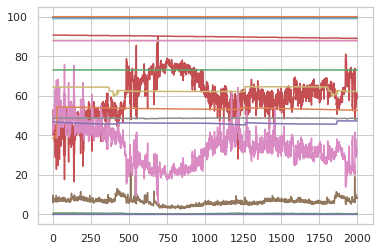

In [32]:
%matplotlib qt
for i in range(1,39):
    y = data_report_sun6c52[col_value][cambios[i-1]:cambios[i]].tolist()
    x = np.arange(len(y))
    plt.plot(x[0:2000], y[0:2000])

NameError: name 'data' is not defined

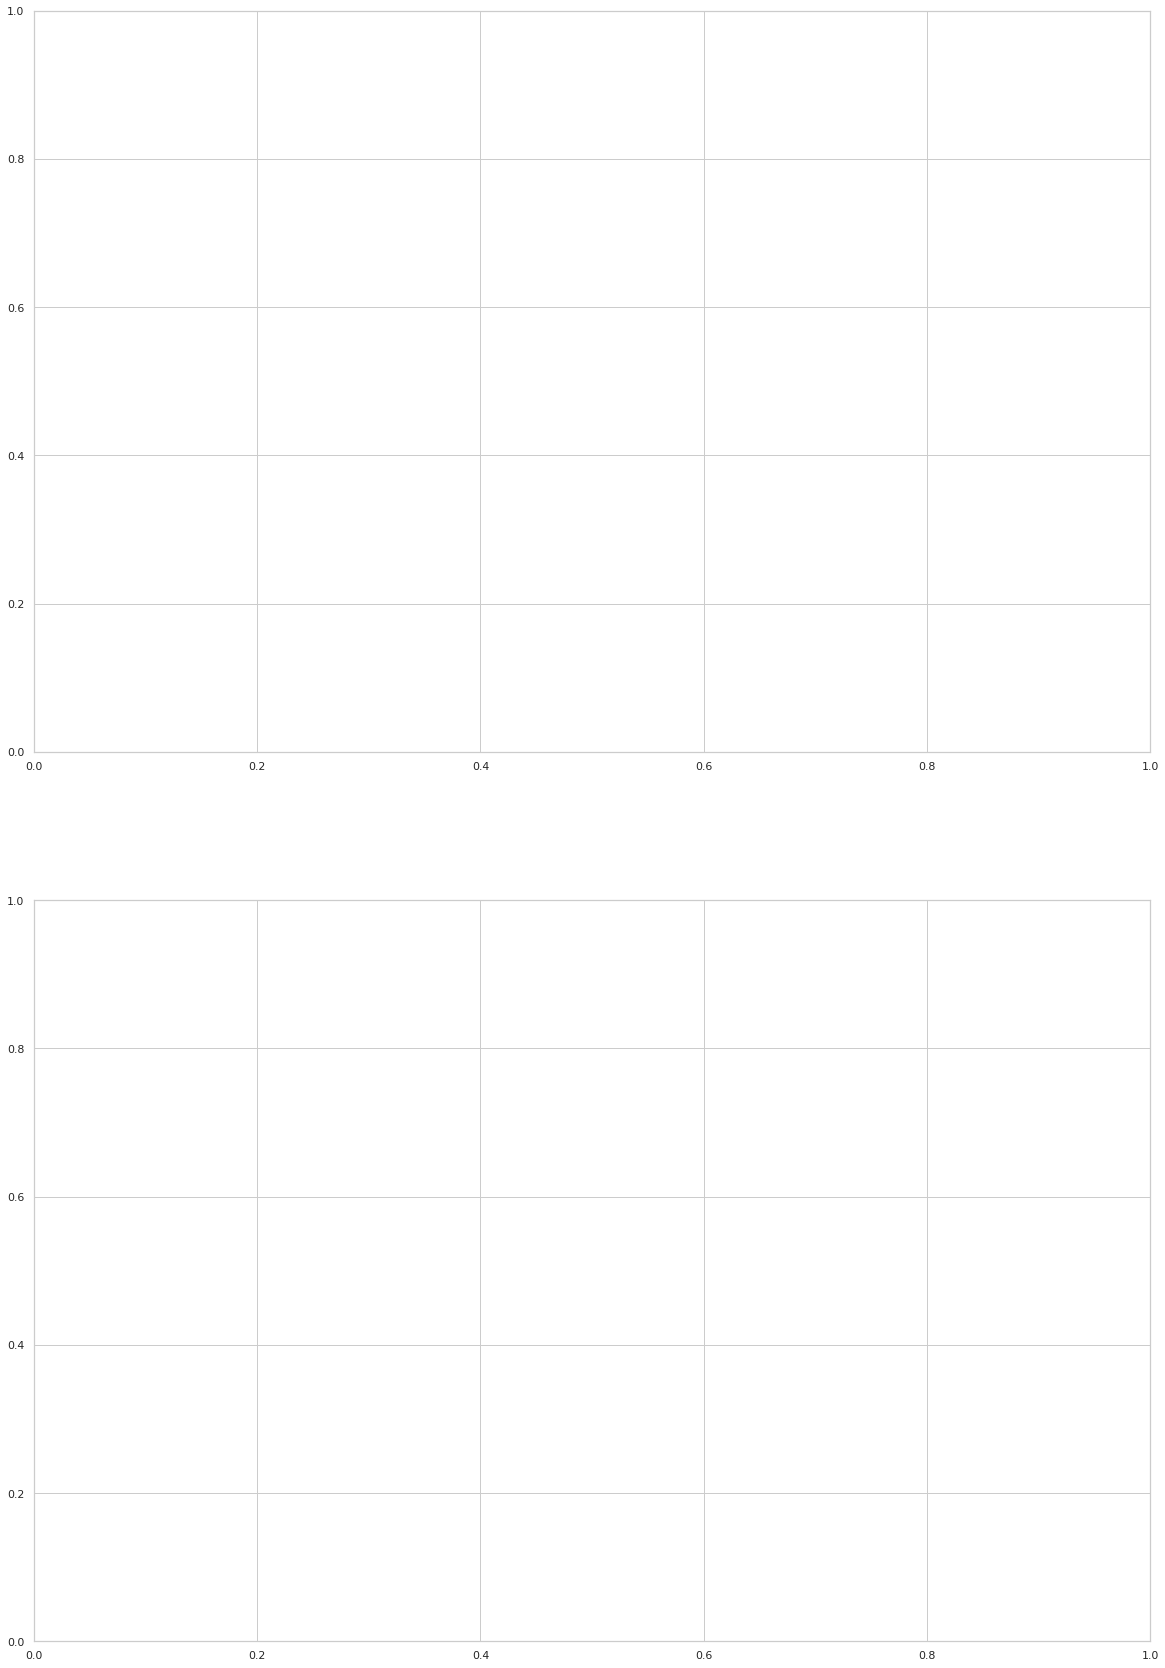

In [33]:

%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 30))
data[col_item_id].plot(ax=axes[0])
data[col_value].plot(ax=axes[1])
